# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [20]:
# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/hcp_data")

# If you are running this on Colab, then use something like this.
# system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

# INSERT CODE HERE
install.packages("tidyverse")
library(tidyverse)
system("gdown --id 1KHDMU8u_B3DHN2NV9ESy3TQaW0WafxXz")
list.files()

#save to data frame called "dat"
dat <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

d1<-dat%>%
  select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)%>%
  na.omit()

head(d1)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "sample_data"                                
[2] "unrestricted_trimmed_1_7_2020_10_50_44.csv" 
[3] "unrestricted_trimmed_1_7_2020_10_50_44.xlsx"

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

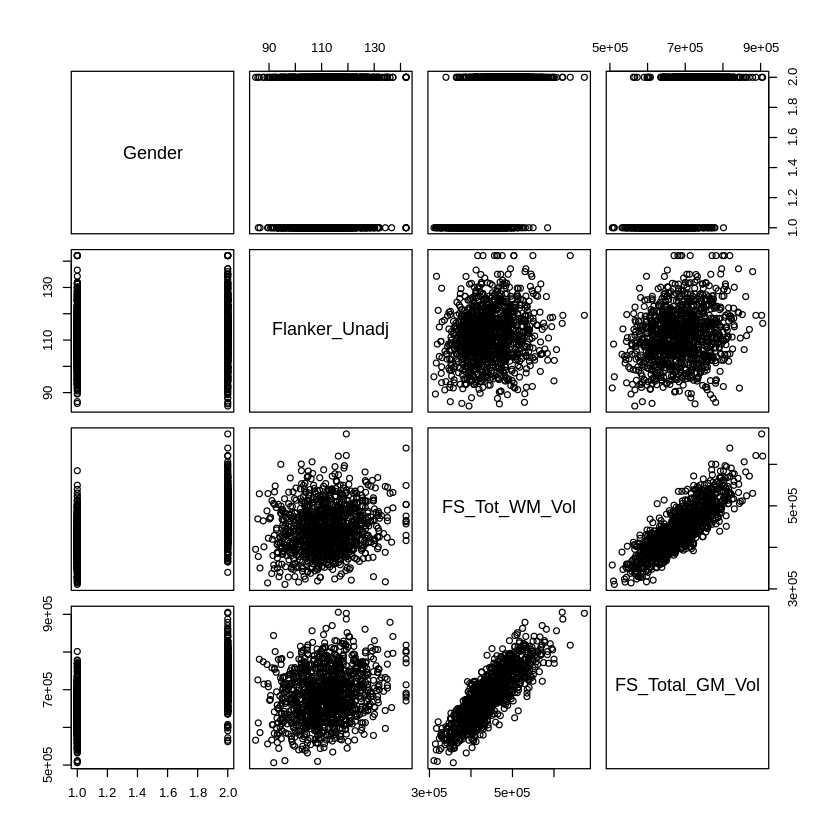

In [25]:
#INSERT CODE HERE
#turn to numeric or factor
d1$Flanker_Unadj<-as.numeric(d1$Flanker_Unadj)
d1$Gender<-factor(d1$Gender, levels = c("F","M"))

#create scatterplots dropping subject ID
pairs(d1[,-1])


> *Write your response here.*
> Flanker_Unadj does not seem strongly correlated with Gender. Perhaps there is a weak positive correlation between Flanker_Unadj and FS_Tot_WM_Vol, or FS_Total_GM_Vol. But, it looks more like FS_Tot_WM_Vol and FS_Total_GM_Vol are strongly positively correlated. It also looks lke there is some relation between the pairs: FS_Tot_WM_Vol and Gender, and FS_Total_GM_Vol and Gender. It looks like on average FS_Tot_WM_Vol and FS_Total_GM_Vol are both higher when Gender = 2 (M).

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [26]:
#INSERT CODE HERE
store_model<-lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(store_model)
confint(store_model,level = 0.95)



Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *Write your response here.*
> Looking at the t-test (and also seeing that the .95% confidence interval for the coefficient estimate does not include 0), it appears that grey matter volume is significantly associated with Flanker Task performance, although the association appears to be quite small (magnitude of the coefficient estimate is very small)

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

`geom_smooth()` using formula = 'y ~ x'


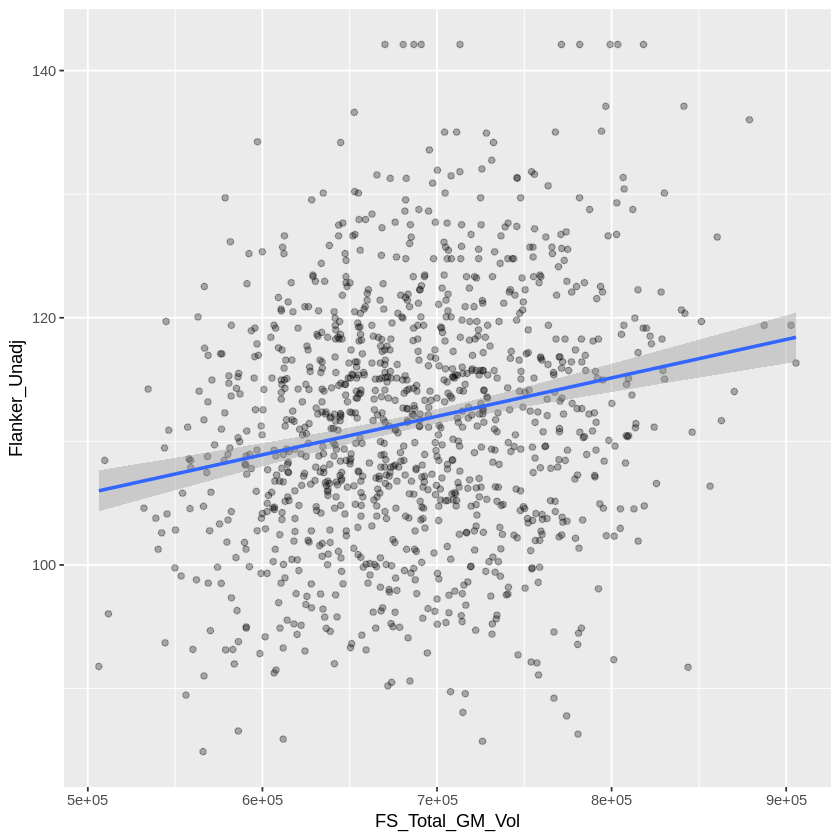

In [28]:
#INSERT CODE HERE
ggplot(data = d1, mapping = aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm",level = 0.95)


> *Write your response here.*
> It appears that there is a weak positive correlation bewteen FS_Total_GM_Vol variable and Flanker_Unadj. The line appears to go through the middle of the mass of the points holding each value of FS_Total_GM_Vol fixed. The relation appears to be very weak as the slope of the predicted regression line is quite flat.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *Write your response here.*
> In the absence, of other predictors, it appears that there is a weak positive relationship between FS_Total_GM_Vol variable and Flanker_Unadj. Although, based on the R^2 value of the model (0.0428), I would say that the variation in Flanker_Unadj which is captured by the variation in FS_Total_GM_Vol in this model is quite small.

**DUE:** 5pm EST, February 26, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*